In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [208]:
data=pd.read_csv('Insurance.csv')

In [209]:
df=pd.DataFrame(data)

In [210]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [211]:
df.shape

(1000, 40)

The dataset has 1000 rows and 40 columns

In [212]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

We can see the columns names

In [213]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The column _c39 has null values

# Identifying variables with "?" values

<AxesSubplot:>

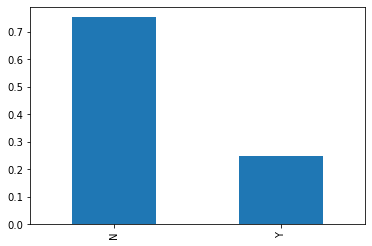

In [214]:
df['fraud_reported'].value_counts(normalize=True).plot.bar()

In [20]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Gives the datatype of each column

# Encoding the object columns

In [25]:
le=LabelEncoder()
df['policy_bind_date']=le.fit_transform(df['policy_bind_date'])

In [26]:
df['policy_state']=le.fit_transform(df['policy_state'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_sex']=le.fit_transform(df['insured_sex'])
df['insured_education_level']=le.fit_transform(df['insured_education_level'])

df['insured_occupation']=le.fit_transform(df['insured_occupation'])
df['policy_csl']=le.fit_transform(df['policy_csl'])
df['insured_hobbies']=le.fit_transform(df['insured_hobbies'])
df['insured_relationship']=le.fit_transform(df['insured_relationship'])

df['incident_date']=le.fit_transform(df['incident_date'])
df['incident_type']=le.fit_transform(df['incident_type'])
df['collision_type']=le.fit_transform(df['collision_type'])
df['incident_severity']=le.fit_transform(df['incident_severity'])

df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])
df['incident_city']=le.fit_transform(df['incident_city'])
df['incident_location']=le.fit_transform(df['incident_location'])
df['property_damage']=le.fit_transform(df['property_damage'])

df['police_report_available']=le.fit_transform(df['police_report_available'])
df['auto_make']=le.fit_transform(df['auto_make'])
df['auto_model']=le.fit_transform(df['auto_model'])
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [28]:
df['incident_state']=le.fit_transform(df['incident_state'])

<AxesSubplot:>

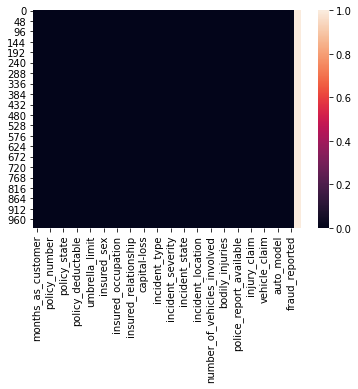

In [30]:
sns.heatmap(df.isnull())

We can see from the heatmap that there are no null values in the dataset

# Checking Outliers

months_as_customer                AxesSubplot(0.125,0.787927;0.110714x0.0920732)
age                            AxesSubplot(0.257857,0.787927;0.110714x0.0920732)
policy_number                  AxesSubplot(0.390714,0.787927;0.110714x0.0920732)
policy_bind_date               AxesSubplot(0.523571,0.787927;0.110714x0.0920732)
policy_state                   AxesSubplot(0.656429,0.787927;0.110714x0.0920732)
policy_csl                     AxesSubplot(0.789286,0.787927;0.110714x0.0920732)
policy_deductable                 AxesSubplot(0.125,0.677439;0.110714x0.0920732)
policy_annual_premium          AxesSubplot(0.257857,0.677439;0.110714x0.0920732)
umbrella_limit                 AxesSubplot(0.390714,0.677439;0.110714x0.0920732)
insured_zip                    AxesSubplot(0.523571,0.677439;0.110714x0.0920732)
insured_sex                    AxesSubplot(0.656429,0.677439;0.110714x0.0920732)
insured_education_level        AxesSubplot(0.789286,0.677439;0.110714x0.0920732)
insured_occupation          

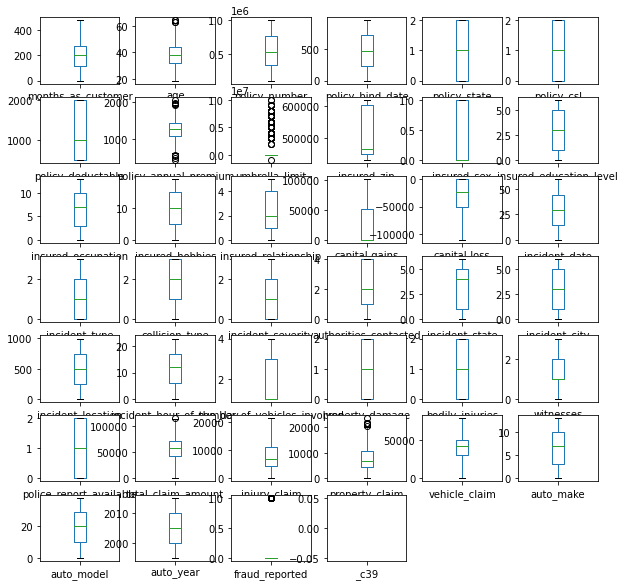

In [31]:

df.plot(kind='box',subplots=True,layout=(7,6),figsize=(10,10))

There are outliers in some columns

# Checking Skewness

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

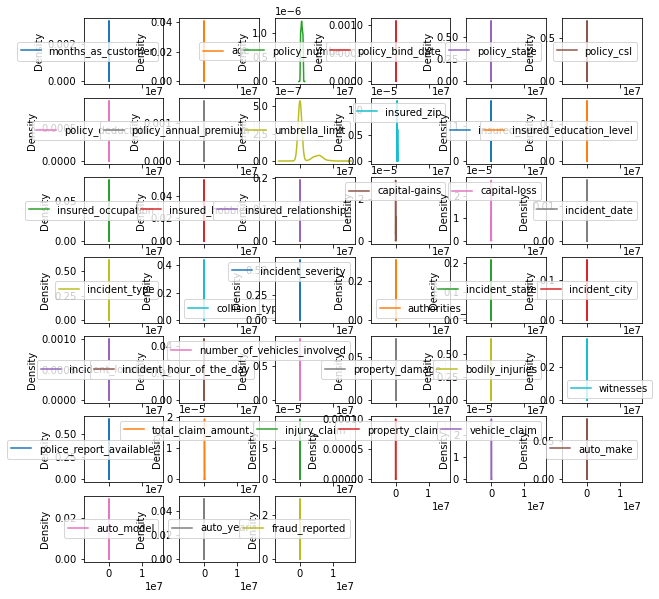

In [36]:
df.plot(kind='kde',subplots=True,layout=(7,6),figsize=(10,10)) 

In [38]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


There is skewness in few columns

# Removing outliers

In [40]:
z=np.abs(zscore(df))

df_new=df[(z<3).all(axis=1)]

In [41]:
df_new.shape

(980, 39)

The dataset has 980 rows and 39 columns after removing outliers 

In [42]:
df.shape

(1000, 39)

# Checking Collinearity

<AxesSubplot:>

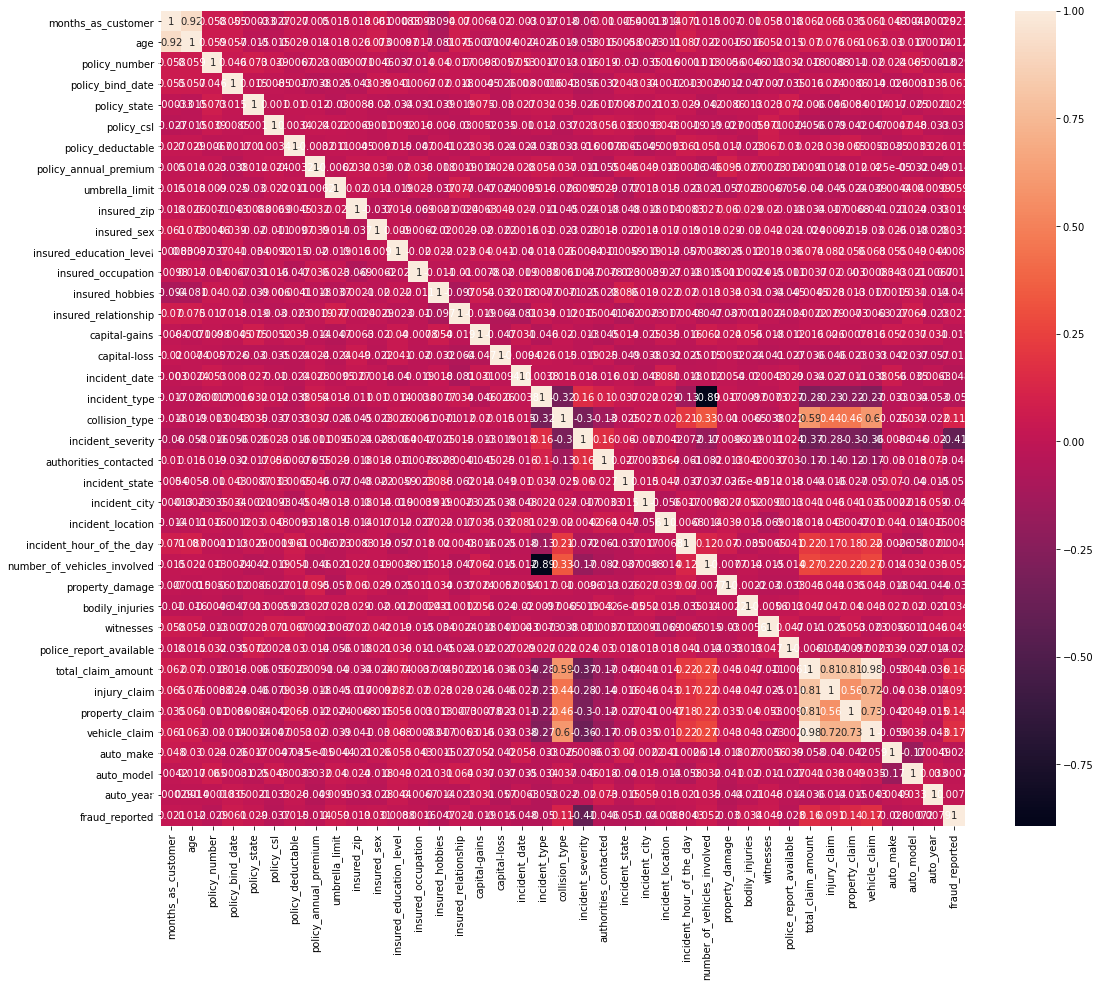

In [44]:

plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

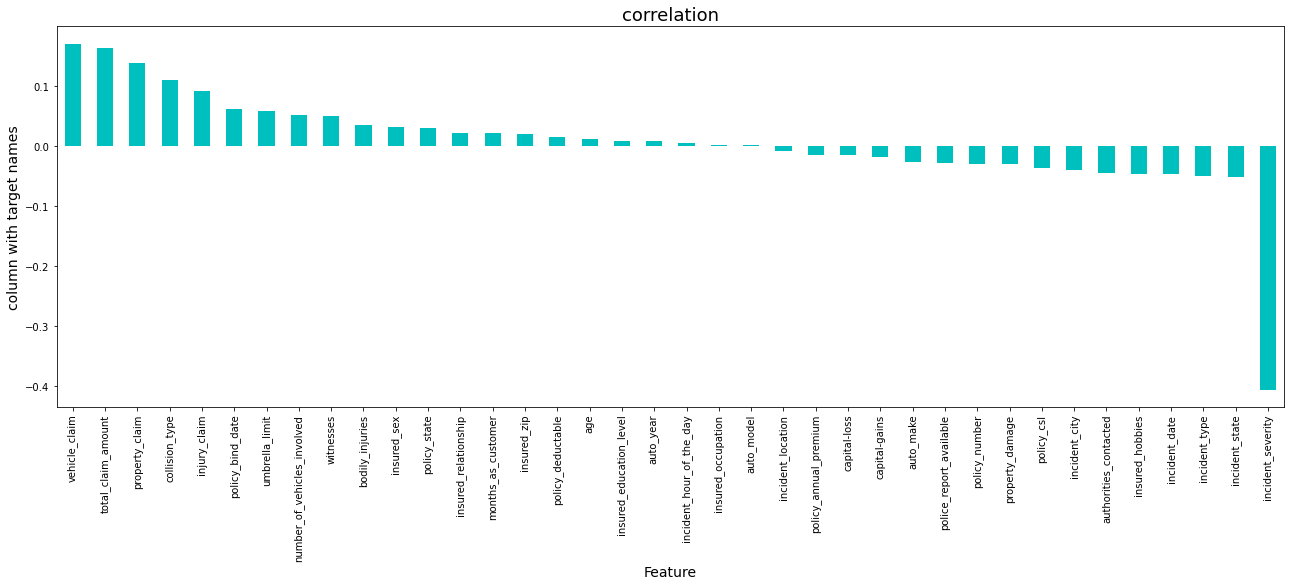

In [45]:
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show


In [226]:

df_new.drop(['incident_severity','vehicle_claim',],axis=1,inplace=True)
    


array([[ 1.04454111, -0.02347493,  0.29902129, ...,  1.08980208,
         0.85481164, -1.80721231],
       [ 0.29904549, -0.74401221,  1.1824092 , ..., -1.5637232 ,
         0.41187331, -0.57848628],
       [-0.51581942,  0.58680474, -0.99804174, ..., -0.58207486,
        -0.56458381,  0.9504262 ],
       ...,
       [-0.55427228,  1.37172562,  0.22317302, ...,  0.18625419,
         1.06823592,  0.05320514],
       [ 1.90408801,  0.02357929,  0.43183104, ..., -0.26790911,
        -1.44793034, -1.29996796],
       [ 1.89156317,  0.10716503, -0.30029896, ..., -1.49907329,
         0.41187331, -0.57848628]])

In [137]:

df_new.drop(['age'],axis=1,inplace=True)

C:\Users\GR20258288\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [141]:
df_new.drop(['auto_year'],axis=1,inplace=True)

C:\Users\GR20258288\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [142]:
x=df_new.iloc[:,:-1]
y=df_new['fraud_reported']

In [143]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [144]:
calc_vif(x)

,variables,VIF FACTOR
0,months_as_customer,4.332721
1,policy_number,5.620642
2,policy_bind_date,3.959646
3,policy_state,2.582511
4,policy_csl,2.446575
5,policy_deductable,4.552249
6,policy_annual_premium,25.625833
7,umbrella_limit,1.261580
8,insured_zip,37.495633
9,insured_sex,1.913385


# Removing skewness

In [145]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

C:\Users\GR20258288\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


# Scaling the input variable

In [146]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Balancing the target variable

In [147]:

smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [148]:
trainy.value_counts()

0    740
1    740
Name: fraud_reported, dtype: int64

# Model selection

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
train_x,test_x,train_y,test_y=train_test_split(trainx,trainy,test_size=22,random_state=45)

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# LogisticRegression

In [152]:
lr=LogisticRegression()
lr.fit(train_x,train_y)
pred=lr.predict(test_x)

acc=accuracy_score(test_y,pred)
print('Accuracy score: {}'.format(accuracy_score(test_y,pred)*100))
confusion_matrix(test_y,pred)
classification_report(test_y,pred)

Accuracy score: 68.18181818181817


'              precision    recall  f1-score   support\n\n           0       1.00      0.53      0.70        15\n           1       0.50      1.00      0.67         7\n\n    accuracy                           0.68        22\n   macro avg       0.75      0.77      0.68        22\nweighted avg       0.84      0.68      0.69        22\n'

In [153]:
confusion_matrix(test_y,pred)

array([[8, 7],
       [0, 7]], dtype=int64)

The accuracy score is 68%

# DecisionTreeClassifier

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
dtc=DecisionTreeClassifier()

In [156]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier()

In [157]:
pred=dtc.predict(test_x)

In [158]:
pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [159]:
accuracy_score(test_y,pred)

0.8181818181818182

In [160]:
confusion_matrix(test_y,pred)

array([[13,  2],
       [ 2,  5]], dtype=int64)

In [161]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.87      0.87        15\n           1       0.71      0.71      0.71         7\n\n    accuracy                           0.82        22\n   macro avg       0.79      0.79      0.79        22\nweighted avg       0.82      0.82      0.82        22\n'

The accuracy score is 82%

# KNeighborsClassifier

In [162]:
from sklearn.neighbors import KNeighborsClassifier

In [163]:
knn=KNeighborsClassifier(n_neighbors=5)

In [164]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

In [165]:
pred=knn.predict(test_x)

In [166]:
accuracy_score(test_y,pred)

0.6818181818181818

In [167]:
confusion_matrix(test_y,pred)

array([[8, 7],
       [0, 7]], dtype=int64)

In [168]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.53      0.70        15\n           1       0.50      1.00      0.67         7\n\n    accuracy                           0.68        22\n   macro avg       0.75      0.77      0.68        22\nweighted avg       0.84      0.68      0.69        22\n'

The accuracy score is 68%

# SVC

In [169]:
from sklearn.svm import SVC

In [170]:
svc=SVC(kernel='poly')

In [171]:
svc.fit(train_x,train_y)

SVC(kernel='poly')

# pred=svc.predict(test_x)

In [173]:
accuracy_score(test_y,pred)

0.8636363636363636

In [174]:
confusion_matrix(test_y,pred)

array([[12,  3],
       [ 0,  7]], dtype=int64)

In [176]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.80      0.89        15\n           1       0.70      1.00      0.82         7\n\n    accuracy                           0.86        22\n   macro avg       0.85      0.90      0.86        22\nweighted avg       0.90      0.86      0.87        22\n'

The accuracy score is 86%

In [227]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rfc=RandomForestClassifier()

In [194]:
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [195]:
pred=rfc.predict(test_x)

In [196]:
accuracy_score(test_y,pred)

1.0

In [197]:
confusion_matrix(test_y,pred)

array([[15,  0],
       [ 0,  7]], dtype=int64)

In [198]:
classification_report(test_y,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       1.00      1.00      1.00         7\n\n    accuracy                           1.00        22\n   macro avg       1.00      1.00      1.00        22\nweighted avg       1.00      1.00      1.00        22\n'

The accuracy score is 100%

# cross_val_score

In [177]:
from sklearn.model_selection import cross_val_score

In [178]:
print(cross_val_score(lr,train_x,train_y,cv=5).mean())

0.5871228169279292


In [199]:
print(cross_val_score(rfc,train_x,train_y,cv=5).mean())

0.8717483406298545


In [179]:
print(cross_val_score(dtc,train_x,train_y,cv=5).mean())

0.7243068304853363


In [180]:
print(cross_val_score(svc,train_x,train_y,cv=5).mean())

0.8086546156380926


In [181]:
print(cross_val_score(knn,train_x,train_y,cv=5).mean())

0.6447229675657864


Comparing the accuracy scores and CV scores RandomForestClassifier is the best model

# GridSearchCV

In [182]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [201]:
parameter={'n_estimators':np.arange(50,200,10),
           'criterion':['gini','entropy'],
           'max_depth':np.arange(2,8)}
           

In [202]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [203]:
GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [204]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 120}

In [205]:
Final_model=RandomForestClassifier(criterion='gini',max_depth=7,n_estimators=120)
Final_model.fit(train_x,train_y)
pred=Final_model.predict(test_x) 
acc=accuracy_score(test_y,pred)

In [206]:
acc

1.0

# Conclusion:The accuracy score is 100% and RandomForestClassifier is the best model